In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline
import scipy.stats as stats
import warnings

## Question 1: Please refer the table below to answer below questions

| Planned to purchase Product A | Actually placed and order for Product A - Yes | Actually placed and order for Product A - No | Total |
| :-: | :-: | :-: | :-: |
| Yes | 400 | 100 | 500 |
| No | 200 | 1300 | 1500 |
| Total | 600 | 1400 | 2000 |

1. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order.
2. Refer to the above table and find the joint probability of the people who planned to purchase and actually placed an order, given that people planned to purchase

In [2]:
# Total people = 2000, total people plan to purchase(pptotal) = 500, total people planned to purchase and placed order(po) = 400
total = 2000
po = 400
pptotal = 500

In [3]:
# People plan to purchase and placed order is 400 out of total 2000. so, P(pp and po) = 400/2000
pp_and_po_prob = po / total
print('People who planned to purchase and actually placed an order: ', pp_and_po_prob)

People who planned to purchase and actually placed an order:  0.2


In [4]:
# Probability of people plan to purchase and placed and order is 0.2. Probability of people plan to purchase is 500/2000=0.25.
# So, probability of people plan to purchase and placed and order given people planed to purchase is P(pppo|pp) = P(pppo)/P(pp)
pp_prob = pptotal/total
pppo_given_pp = pp_and_po_prob/pp_prob
print('People who planned to purchase and actually placed an order, given that people planned to purchase: ', pppo_given_pp)

People who planned to purchase and actually placed an order, given that people planned to purchase:  0.8


## Question 2: An electrical manufacturing company conducts quality checks at specified periods on the products it manufactures. Historically, the failure rate for the manufactured item is 5%. Suppose a random sample of 10 manufactured items is selected. Answer the following questions.
A. Probability that none of the items are defective? \
B. Probability that exactly one of the items is defective? \
C. Probability that two or fewer of the items are defective? \
D. Probability that three or more of the items are defective ?

In [5]:
failureRate = 0.05
sampleCount = 10
sample = np.arange(0,11)

In [6]:
#itemdistribution = stats.poisson.pmf(sample, failureRate)
itemdistribution = stats.binom.pmf(sample, sampleCount, failureRate)
# probability of distribution for different value of item
itemdistribution 

array([5.98736939e-01, 3.15124705e-01, 7.46347985e-02, 1.04750594e-02,
       9.64808106e-04, 6.09352488e-05, 2.67259863e-06, 8.03789063e-08,
       1.58642578e-09, 1.85546875e-11, 9.76562500e-14])

In [7]:
# Probability that none of the items are defective (i.e. item == 0)
print('P(item == 0): ', itemdistribution[0])

P(item == 0):  0.5987369392383789


In [8]:
# Probability that exactly one of the items is defective (i.e. item == 1) 
print('P(item == 1): ', itemdistribution[1])

P(item == 1):  0.31512470486230504


In [10]:
cdfdistro = stats.binom.cdf(sample, sampleCount, failureRate)
cdfdistro

array([0.59873694, 0.91386164, 0.98849644, 0.9989715 , 0.99993631,
       0.99999725, 0.99999992, 1.        , 1.        , 1.        ,
       1.        ])

In [12]:
# Probability that two or fewer of the items are defective (i.e. item <= 2)
print('P(item <= 2): ', cdfdistro[2])

P(item <= 2):  0.9884964426207031


In [14]:
# Probability that three or more of the items are defective (i.e. item >= 3)
print('P(item >= 3): ', (1-cdfdistro[2]))

P(item >= 3):  0.01150355737929687


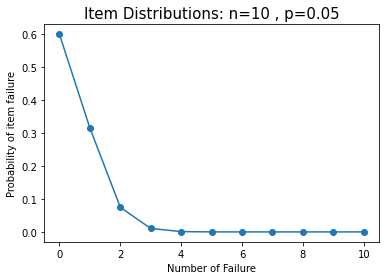

In [15]:
#visualising the plot with pyplot
plt.plot(sample,itemdistribution,'o-')
plt.title('Item Distributions: n=%i , p=%.2f' % (sampleCount,failureRate), fontsize=15)
plt.xlabel('Number of Failure')
plt.ylabel('Probability of item failure')
plt.show()

## Question 3: A car salesman sells on an average 3 cars per week. 
A. Probability that in a given week he will sell some cars. \
B. Probability that in a given week he will sell 2 or more but less than 5 cars. \
C. Plot the poisson distribution function for cumulative probability of cars sold per-week vs number of cars sold perweek.

In [17]:
saleRate = 3
cars = np.arange(0,10)

In [18]:
salespmf = stats.poisson.cdf(cars,saleRate)
salespmf

array([0.04978707, 0.19914827, 0.42319008, 0.64723189, 0.81526324,
       0.91608206, 0.96649146, 0.9880955 , 0.99619701, 0.99889751])

In [19]:
# Probability that in a given week he will sell some cars is nothing but sale is greater than 0
print('Sale some cars: ', (1-salespmf[0]))

Sale some cars:  0.950212931632136


In [23]:
# Probability that in a given week he will sell 2 or more but less than 5 cars.
print('P(sale > 2 and sale < 5): ', salespmf[4]-salespmf[1])

P(sale > 2 and sale < 5):  0.6161149710523164


In [27]:
salescdf = stats.poisson.(cars, saleRate)
salescdf

array([0.04978707, 0.14936121, 0.22404181, 0.22404181, 0.16803136,
       0.10081881, 0.05040941, 0.02160403, 0.00810151, 0.0027005 ])

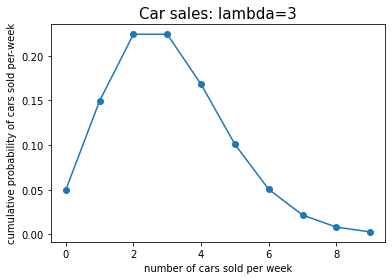

In [28]:
#visualising the plot with pyplot
plt.plot(cars,salescdf,'o-')
plt.title('Car sales: lambda=%i' % saleRate, fontsize=15)
plt.xlabel('number of cars sold per week')
plt.ylabel('cumulative probability of cars sold per-week')
plt.show()

### Question 4: Accuracy in understanding orders for a speech based bot at a restaurant is important for the Company X which has designed, marketed and launched the product for a contactless delivery due to the COVID-19 pandemic. Recognition accuracy that measures the percentage of orders that are taken correctly is 86.8%. Suppose that you place order with the bot and two friends of yours independently place orders with the same bot. Answer the following questions.
A. What is the probability that all three orders will be recognised correctly? \
B. What is the probability that none of the three orders will be recognised correctly? \
C. What is the probability that at least two of the three orders will be recognised correctly? \

Using Binomial distribution equation,

        P(X = 3|n =3, pi given = 0.868)
        3!/ 3!(3-3)! * (0.868)^3 * (1-0.868)^3-3 = 0.6540

        Likewise, calculate X= 0, X=2
         (X = 0) = 0.0023
         (X = 2) = 0.2984

        Hence, P(X>=2) = P(X=2)+P(X=3) = 0.9524

In [29]:
from math import factorial as f

P_X3 = f(3)/(f(3)*f(3-3)) * (0.868)**3 * (1-0.868)**(3-3)
P_X0 = f(3)/(f(0)*f(3-0)) * (0.868)**0 * (1-0.868)**(3-0)
P_X2 = f(3)/(f(2)*f(3-2)) * (0.868)**2 * (1-0.868)**(3-2)

print("The probability that all the three orders are filled correctly is",P_X3)
print("The probability that none of the orders are filled correctly is",P_X0)
print("The probability that atleat two of the three are filled correctly is", P_X2+P_X3)

The probability that all the three orders are filled correctly is 0.653972032
The probability that none of the orders are filled correctly is 0.0022999680000000003
The probability that atleat two of the three are filled correctly is 0.952327936


### Question 4: A group of 300 professionals sat for a competitive exam. The results show the information of marks obtained by them have a mean of 60 and a standard deviation of 12. The pattern of marks follows a normal distribution. Answer the following questions.
A. What is the percentage of students who score more than 80. \
B. What is the percentage of students who score less than 50. \
C. What should be the distinction mark if the highest 10% of students are to be awarded distinction?

In [21]:
# Calculate the Z  value for the normal distribution 
z = (80-60)/12
z

1.6666666666666667

In [22]:
print('A. % of student score more than 80: ', (1-stats.norm.cdf(z))*100)

A. % of student score more than 80:  4.77903522728147


In [23]:
# Alternate way is to use normal distribution function
print('A. % of student score more than 80: ', (1-stats.norm.cdf(80,loc=60,scale=12))*100)

A. % of student score more than 80:  4.77903522728147


In [24]:
print('B. % of student who score less than 50: ', stats.norm.cdf(50,loc=60,scale=12)*100)

B. % of student who score less than 50:  20.232838096364308


In [25]:
print('B. % of student who score less than 50: ', stats.norm.cdf(50,loc=60,scale=12)*100)

B. % of student who score less than 50:  20.232838096364308


In [26]:
# To calculate top 10% mark, P(Z >= (x-60)/12) = 1.282
# solving above equation will give the cut off for top 10%
x = (1.282 * 12) + 60
print('C.  Distinction mark if the highest 10% of students are to be awarded distinction: ', x)

C.  Distinction mark if the highest 10% of students are to be awarded distinction:  75.384


### Question 5: Explain 1 real life industry scenario [other than the ones mentioned above] where you can use the concepts learnt in this module of Applied statistics to get a data driven business solution.

 1. Manufacturing industry: Probability of finding out faulty product out of a production batch
 2. Customer service industry: Probability of finding out number of customers to attend in a busy hour
 3. Human Resource: Nomalise employee ratings in an organisation
 4. Telecom Industry: Probablity of a phone call dropping in busy hours of the day

### DOMAIN: Sports
##### CONTEXT: Company X manages the men's top professional basketball division of the American league system. The dataset contains information on all the teams that have participated in all the past tournaments. It has data about how many baskets each team scored, conceded, how many times they came within the first 2 positions, how many tournaments they have qualified, their best position in the past, etc. 
##### DATA DESCRIPTION: Basketball.csv - The data set contains information on all the teams so far participated in all the past tournaments.
##### PROJECT OBJECTIVE: Company’s management wants to invest on proposal on managing some of the best teams in the league. The analytics department has been assigned with a task of creating a report on the performance shown by the teams. Some of the older teams are already in contract with competitors. Hence Company X wants to understand which teams they can approach which will be a deal win for them.

In [27]:
sportsdf = pd.read_csv("DS - Part2 - Basketball.csv")

In [28]:
sportsdf.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1


In [29]:
print('Shape: ', sportsdf.shape)

Shape:  (61, 13)


In [30]:
sportsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Team                 61 non-null     object
 1   Tournament           61 non-null     int64 
 2   Score                61 non-null     object
 3   PlayedGames          61 non-null     object
 4   WonGames             61 non-null     object
 5   DrawnGames           61 non-null     object
 6   LostGames            61 non-null     object
 7   BasketScored         61 non-null     object
 8   BasketGiven          61 non-null     object
 9   TournamentChampion   61 non-null     object
 10  Runner-up            61 non-null     object
 11  TeamLaunch           61 non-null     object
 12  HighestPositionHeld  61 non-null     int64 
dtypes: int64(2), object(11)
memory usage: 6.3+ KB


In [31]:
# check missing values
sportsdf.isna().apply(pd.value_counts)

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld
False,61,61,61,61,61,61,61,61,61,61,61,61,61


In [32]:
sportsdf = sportsdf.replace('-','0')
sportsdf['Year'] = sportsdf['TeamLaunch'].str[0:4]
sportsdf['Title'] = sportsdf['TournamentChampion']+sportsdf['Runner-up']
sportsdf.head()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,TournamentChampion,Runner-up,TeamLaunch,HighestPositionHeld,Year,Title
0,Team 1,86,4385,2762,1647,552,563,5947,3140,33,23,1929,1,1929,3323
1,Team 2,86,4262,2762,1581,573,608,5900,3114,25,25,1929,1,1929,2525
2,Team 3,80,3442,2614,1241,598,775,4534,3309,10,8,1929,1,1929,108
3,Team 4,82,3386,2664,1187,616,861,4398,3469,6,6,1931to32,1,1931,66
4,Team 5,86,3368,2762,1209,633,920,4631,3700,8,7,1929,1,1929,87


In [33]:
convert_dict = {'Score': int, 'PlayedGames': int, 'WonGames': int, 'DrawnGames': int, 'LostGames':int, 'BasketScored':int,
                'BasketGiven': int, 'TournamentChampion': int, 'Runner-up':int, 'Title': int }
sportsdf = sportsdf.astype(convert_dict)
sportsdf.drop(['HighestPositionHeld','TournamentChampion','Runner-up','TeamLaunch'],inplace=True,axis=1)
sportsdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Team          61 non-null     object
 1   Tournament    61 non-null     int64 
 2   Score         61 non-null     int32 
 3   PlayedGames   61 non-null     int32 
 4   WonGames      61 non-null     int32 
 5   DrawnGames    61 non-null     int32 
 6   LostGames     61 non-null     int32 
 7   BasketScored  61 non-null     int32 
 8   BasketGiven   61 non-null     int32 
 9   Year          61 non-null     object
 10  Title         61 non-null     int32 
dtypes: int32(8), int64(1), object(2)
memory usage: 3.5+ KB


In [34]:
# 5 point summary
sportsdf.describe(include='all')

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,Year,Title
count,61,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,61,61.000000
unique,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45,NaN
top,Team 26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1929,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,NaN
mean,NaN,24.000000,901.426230,796.819672,303.967213,188.934426,303.754098,1140.344262,1140.229508,NaN,101.245902
std,NaN,26.827225,1134.899121,876.282765,406.991030,201.799477,294.708594,1506.740211,1163.710766,NaN,529.422694
min,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,NaN,4.000000,96.000000,114.000000,34.000000,24.000000,62.000000,153.000000,221.000000,NaN,0.000000
50%,NaN,12.000000,375.000000,423.000000,123.000000,95.000000,197.000000,430.000000,632.000000,NaN,0.000000
75%,NaN,38.000000,1351.000000,1318.000000,426.000000,330.000000,563.000000,1642.000000,1951.000000,NaN,0.000000


In [35]:
sportsdf.mean()

Tournament       2.400000e+01
Score            9.014262e+02
PlayedGames      7.968197e+02
WonGames         3.039672e+02
DrawnGames       1.889344e+02
LostGames        3.037541e+02
BasketScored     1.140344e+03
BasketGiven      1.140230e+03
Year            3.162611e+241
Title            1.012459e+02
dtype: float64

In [36]:
sportsdf.median()

Tournament        12.0
Score            375.0
PlayedGames      423.0
WonGames         123.0
DrawnGames        95.0
LostGames        197.0
BasketScored     430.0
BasketGiven      632.0
Year            1951.0
Title              0.0
dtype: float64

In [37]:
sportsdf.mode()

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,Year,Title
0,Team 1,1.0,0,30.0,7.0,14.0,37.0,70.0,0,1929,0.0
1,Team 10,NaN,14,2762.0,8.0,16.0,NaN,NaN,55,NaN,NaN
2,Team 11,NaN,19,NaN,NaN,44.0,NaN,NaN,57,NaN,NaN
3,Team 12,NaN,22,NaN,NaN,95.0,NaN,NaN,65,NaN,NaN
4,Team 13,NaN,34,NaN,NaN,NaN,NaN,NaN,66,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
56,Team 60,NaN,3368,NaN,NaN,NaN,NaN,NaN,3309,NaN,NaN
57,Team 61,NaN,3386,NaN,NaN,NaN,NaN,NaN,3373,NaN,NaN
58,Team 7,NaN,3442,NaN,NaN,NaN,NaN,NaN,3469,NaN,NaN
59,Team 8,NaN,4262,NaN,NaN,NaN,NaN,NaN,3700,NaN,NaN


In [38]:
# IQR
IQR = sportsdf.quantile(0.75)-sportsdf.quantile(0.25)
IQR

Tournament        34.0
Score           1255.0
PlayedGames     1204.0
WonGames         392.0
DrawnGames       306.0
LostGames        501.0
BasketScored    1489.0
BasketGiven     1730.0
Title              0.0
dtype: float64

array([[<AxesSubplot:title={'center':'Tournament'}>,
        <AxesSubplot:title={'center':'Score'}>,
        <AxesSubplot:title={'center':'PlayedGames'}>],
       [<AxesSubplot:title={'center':'WonGames'}>,
        <AxesSubplot:title={'center':'DrawnGames'}>,
        <AxesSubplot:title={'center':'LostGames'}>],
       [<AxesSubplot:title={'center':'BasketScored'}>,
        <AxesSubplot:title={'center':'BasketGiven'}>,
        <AxesSubplot:title={'center':'Title'}>]], dtype=object)

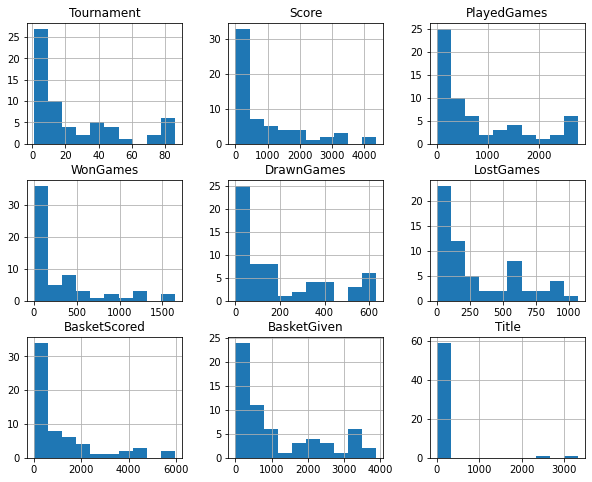

In [39]:
sportsdf.hist(figsize=(10,8))

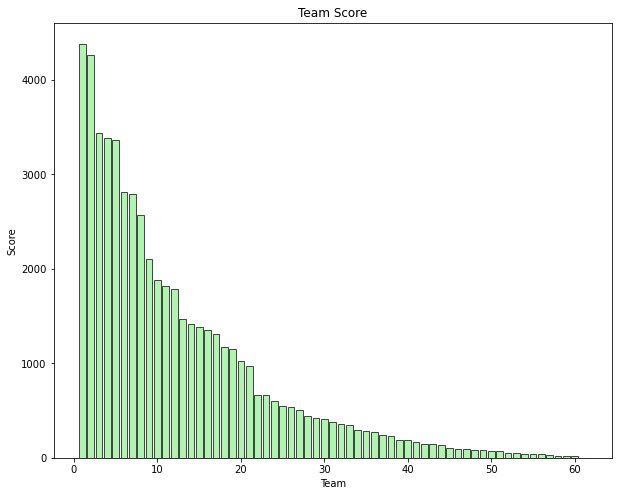

In [40]:
# Visualize score of each team
x = sportsdf.Team.index+1
y = sportsdf.Score
plt.figure(figsize=(10,8))
plt.bar(x,y,align='center',color = 'lightgreen',edgecolor = 'black', alpha = 0.7)
plt.ylabel('Score')
plt.xlabel("Team")
plt.title('Team Score')
plt.show()

#### Conclusion: Most successfull Team in the league is Team 1 with over 4000 score and Team 60 with lowest performance.

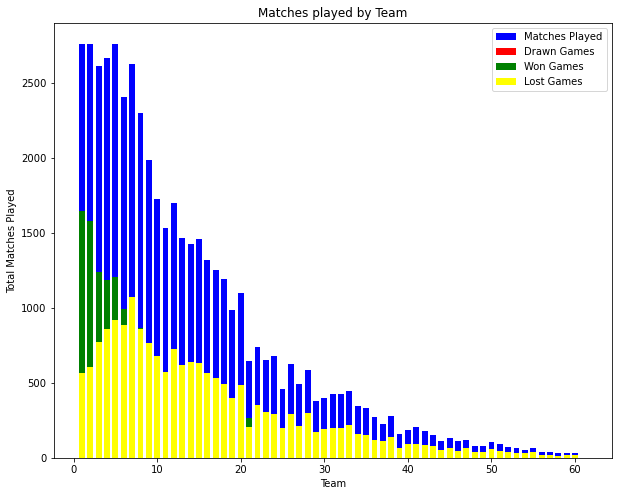

In [41]:
labels = sportsdf.Team.index+1
matches_played = sportsdf.PlayedGames
won_games = sportsdf.WonGames
drawn_games = sportsdf.DrawnGames
lost_games = sportsdf.LostGames

width = 0.7
fig, ax = plt.subplots(figsize=(10,8))
ax.bar(labels, matches_played, width, color = 'blue', label='Matches Played')
ax.bar(labels, drawn_games, width, color = 'red', label='Drawn Games')
ax.bar(labels, won_games, width, color = 'green', label='Won Games')
ax.bar(labels, lost_games, width, color = 'yellow', label='Lost Games')

ax.set_ylabel('Total Matches Played')
ax.set_xlabel('Team')
ax.set_title('Matches played by Team')
ax.legend()

plt.show()

#### Conclusion: First 5 teams has played highest matches out of which team 1 has won maximum matches.

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


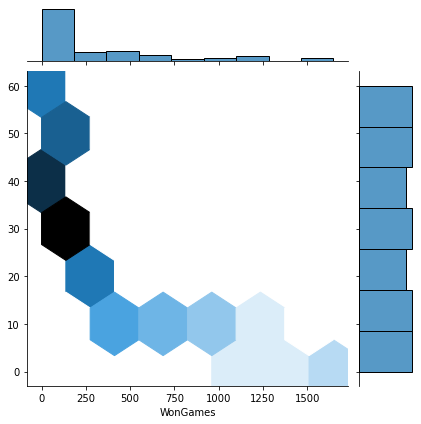

In [42]:
# Visualize maximum win by individual team
jointplot = sns.jointplot(sportsdf.WonGames, sportsdf.Team.index, kind="hex")
jointplot

##### Conclusion: Alternate view of the Matches won 

In [43]:
# Calculate winning percentage as WonGames+(DrawnGames*0.5)/PlayedGames
winpercentage = ((sportsdf.WonGames+(sportsdf.DrawnGames*0.5))/sportsdf.PlayedGames)*100
winpercentage = winpercentage.replace(np.nan, 0)
teams = sportsdf.Team.index+1
winner = pd.DataFrame({"Team":teams, "Percentage":winpercentage})
print('Top 10% team based on winning percentage is as below:')
winner[winner['Percentage'] > winner['Percentage'].quantile(0.90)]

Top 10% team based on winning percentage is as below:


,Team,Percentage
0,1,69.623461
1,2,67.614048
2,3,58.913542
3,4,56.118619
4,5,55.231716
20,21,54.489164


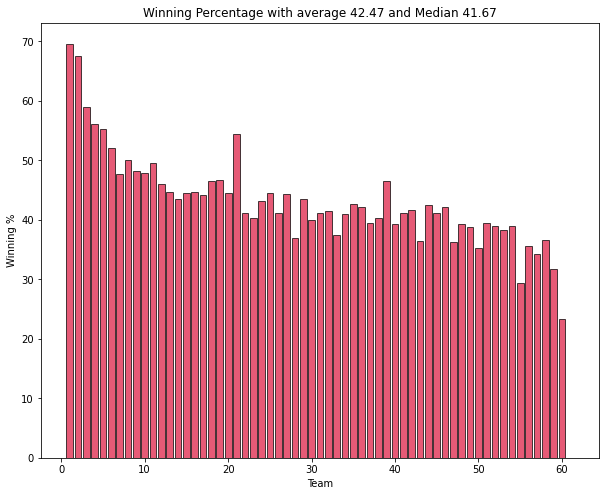

In [44]:
x = sportsdf.Team.index+1
y = sportsdf.Score
plt.figure(figsize=(10,8))
plt.bar(winner['Team'],winner['Percentage'],align='center',color = 'crimson',edgecolor = 'black', alpha = 0.7)
plt.ylabel('Winning %')
plt.xlabel("Team")
plt.title('Winning Percentage with average %.2f and Median %.2f'%(np.mean(winpercentage),winner['Percentage'].median()))
plt.show()

#### Conclusion: Highest winning percentage holds by Team 1. Also, top 10% and bottom 10% teams has been displayed.

In [45]:
# Calculate Loosing percentage as LostGames+(DrawnGames*0.5)/PlayedGames
loosingpercentage = ((sportsdf.LostGames+(sportsdf.DrawnGames*0.5))/sportsdf.PlayedGames)*100
losspercentage = loosingpercentage.replace(np.nan, 0)
teams = sportsdf.Team.index+1
looser = pd.DataFrame({"Team":teams, "Percentage":losspercentage})
print('Bottom 10% team based on winning percentage is as below:')
looser[looser['Percentage'] > looser['Percentage'].quantile(0.90)]

Bottom 10% team based on winning percentage is as below:


,Team,Percentage
49,50,64.814815
54,55,70.588235
55,56,64.473684
56,57,65.789474
58,59,68.333333
59,60,76.666667


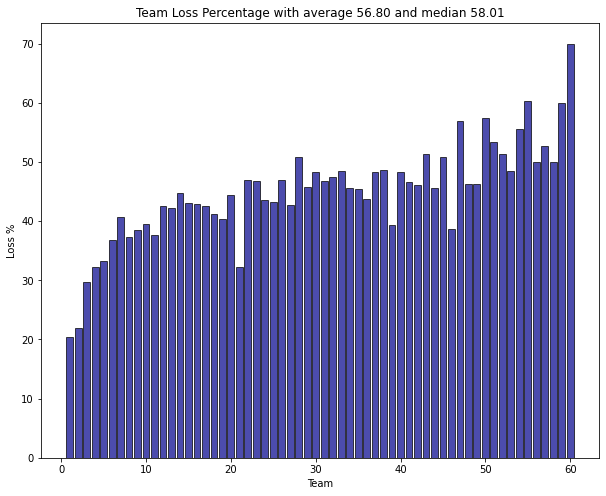

In [46]:
loosingstats = (sportsdf.LostGames/sportsdf.PlayedGames)*100
loosingstats.replace(np.nan, 0)
x = sportsdf.Team.index+1
y = sportsdf.Score
plt.figure(figsize=(10,8))
plt.bar(sportsdf.Team.index+1,loosingstats,align='center',color = 'darkblue',edgecolor = 'black', alpha = 0.7)
plt.ylabel('Loss %')
plt.xlabel("Team")
plt.title('Team Loss Percentage with average %.2f and median %.2f'%(np.mean(loosingpercentage),loosingpercentage.median()))
plt.show()

#### Conclusion: Average team loss percentage is 56.8% and Team 60 has poor performance.

In [47]:
launch = sportsdf['Year']
gameswon = sportsdf['WonGames']
teams = sportsdf.Team.index+1
colors = [(t/100,0,0) for t in range(len(teams))] 
#sns.set(rc={'figure.figsize':(15,10)})
plt.figure(figsize=(15,10))
data_plot = pd.DataFrame({"Year":launch, "Won":gameswon, "Team": teams})
data_plot = data_plot.sort_values(['Year'])
data_plot

,Year,Won,Team
0,1929,1647,1
13,1929,453,14
44,1929,43,45
7,1929,864,8
6,1929,948,7
...,...,...,...
36,2007,62,37
56,2009,8,57
43,2014,35,44
55,2016,8,56


<Figure size 1080x720 with 0 Axes>

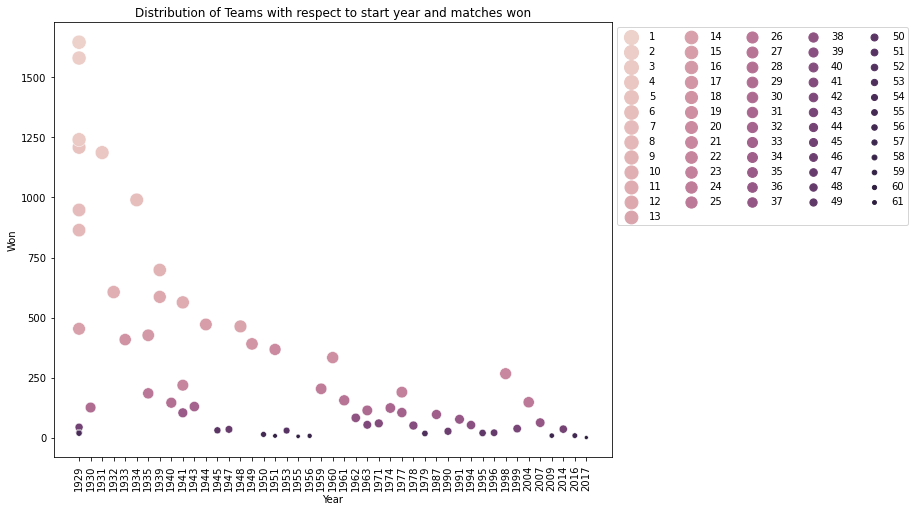

In [48]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='Year', y='Won', hue="Team", data=data_plot, legend='full', size="Team", sizes=(200, 15))
plt.xticks(rotation=90)
plt.legend(loc='upper left', ncol=5, bbox_to_anchor=(1, 1))
plt.title("Distribution of Teams with respect to start year and matches won")
plt.show()

#### Conclusion: Older teams has better performance compare to the team which has started recently

In [49]:
sportsdf.corr()

,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,Title
Tournament,1.000000,0.981441,0.998677,0.971954,0.989387,0.949863,0.975059,0.987828,0.446210
Score,0.981441,1.000000,0.979824,0.997240,0.958452,0.880040,0.996656,0.944263,0.577122
PlayedGames,0.998677,0.979824,1.000000,0.967641,0.994053,0.956503,0.970127,0.990129,0.433367
WonGames,0.971954,0.997240,0.967641,1.000000,0.939844,0.852785,0.999318,0.926234,0.615379
DrawnGames,0.989387,0.958452,0.994053,0.939844,1.000000,0.973156,0.942668,0.992579,0.359923
LostGames,0.949863,0.880040,0.956503,0.852785,0.973156,1.000000,0.859169,0.985275,0.192386
BasketScored,0.975059,0.996656,0.970127,0.999318,0.942668,0.859169,1.000000,0.931548,0.605616
BasketGiven,0.987828,0.944263,0.990129,0.926234,0.992579,0.985275,0.931548,1.000000,0.334158
Title,0.446210,0.577122,0.433367,0.615379,0.359923,0.192386,0.605616,0.334158,1.000000


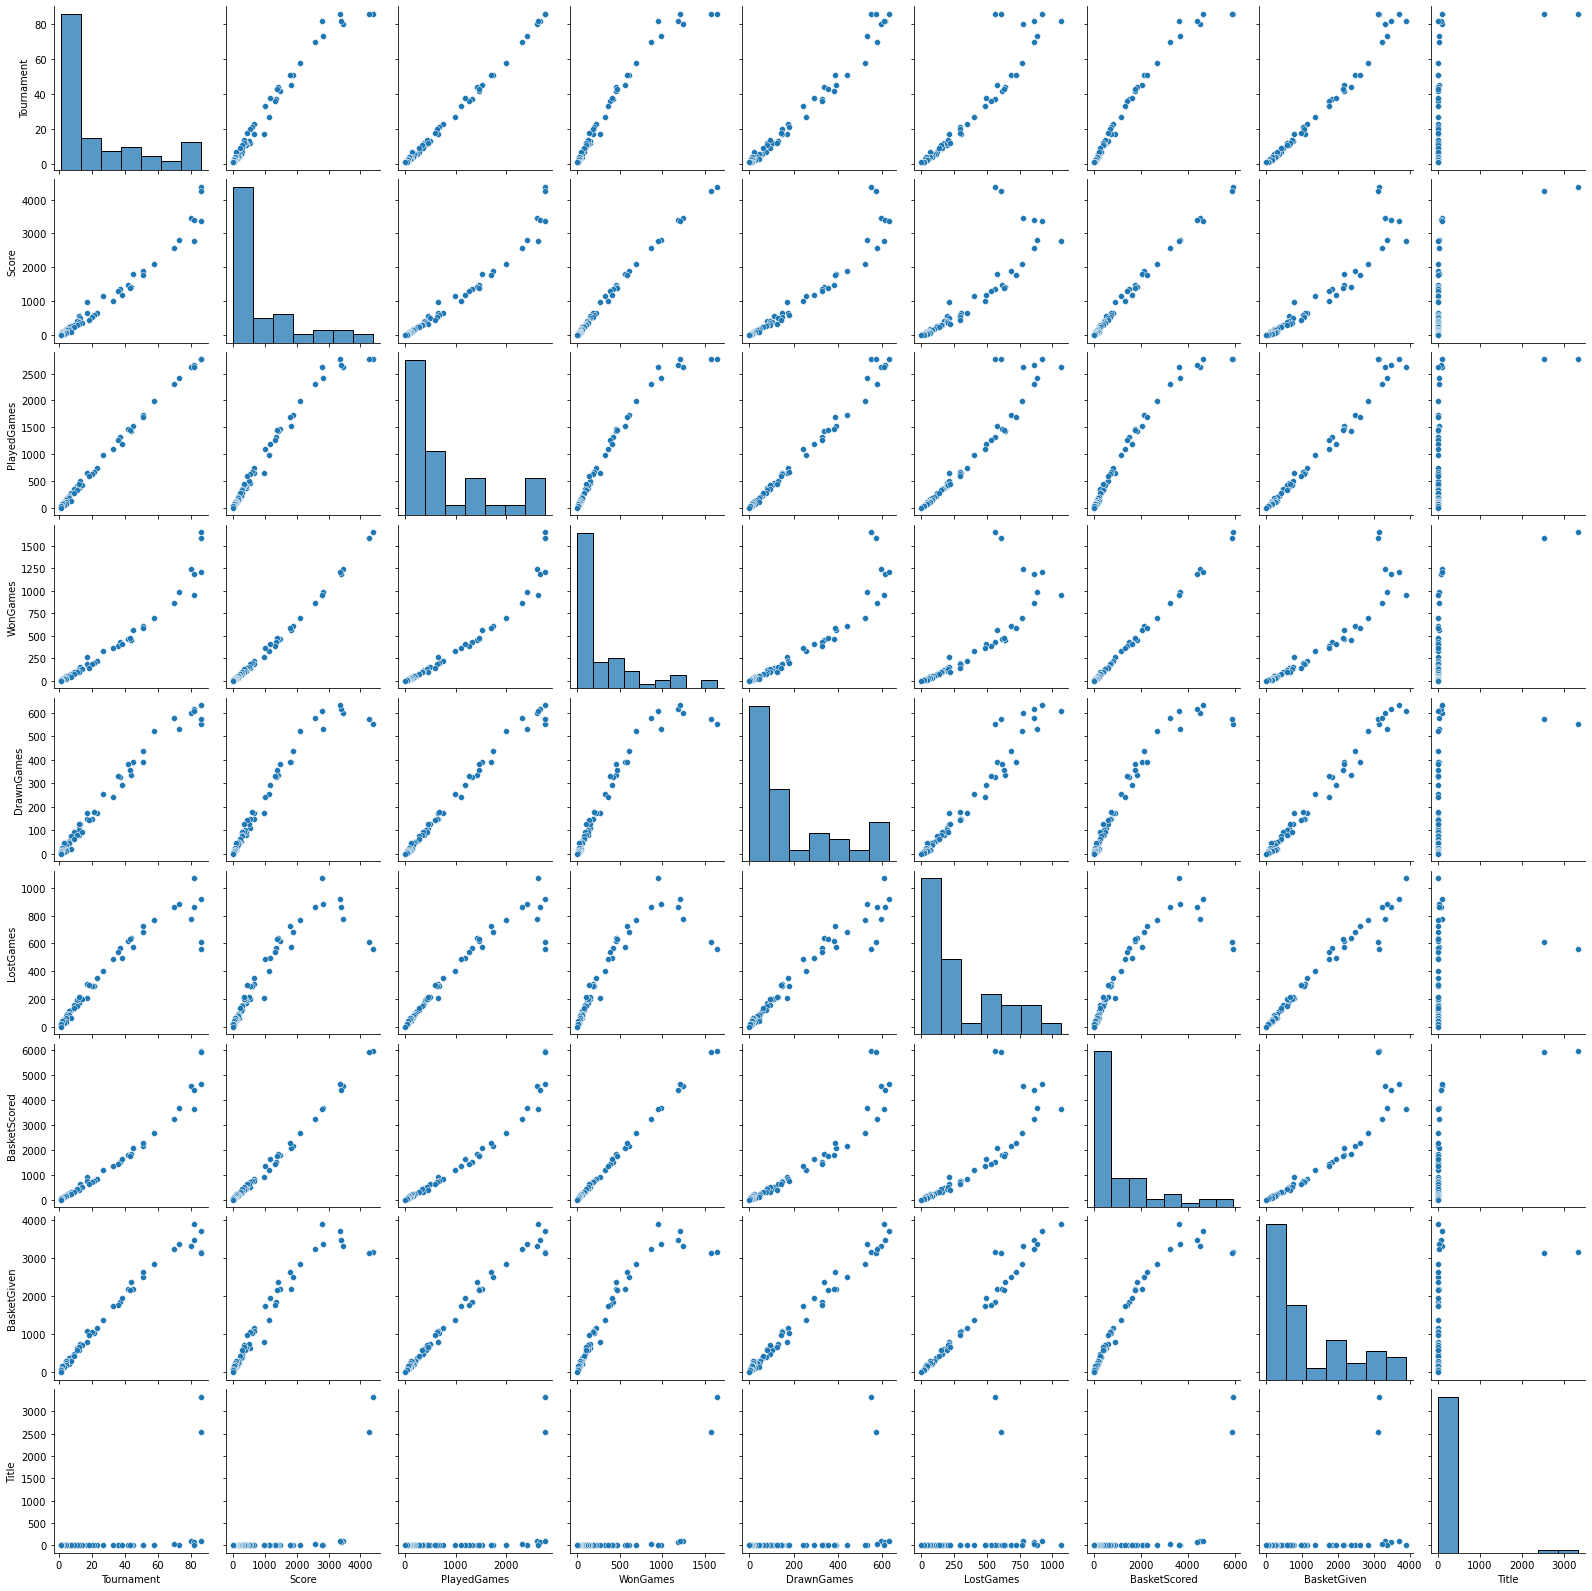

In [50]:
sns.pairplot(sportsdf)

#### Conclusion: BasketScored & WonGames, BasketScored & score has linear relationship. So, team who has scored highest basket is likely to win and score more

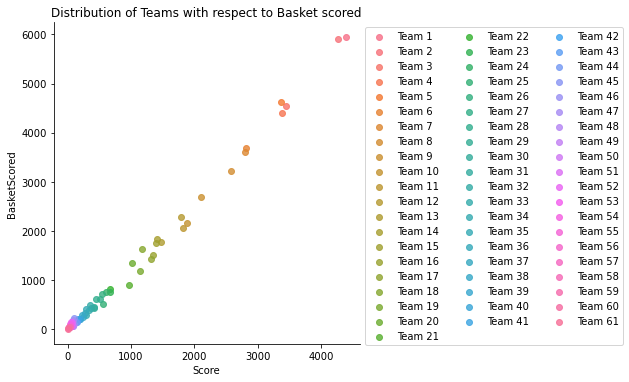

In [51]:
sns.lmplot(y="BasketScored", x="Score",hue="Team", data=sportsdf, legend=False)
plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(1, 1))
plt.title("Distribution of Teams with respect to Basket scored")
plt.show()

#### Conclusion: Team who scores more has highest baskets

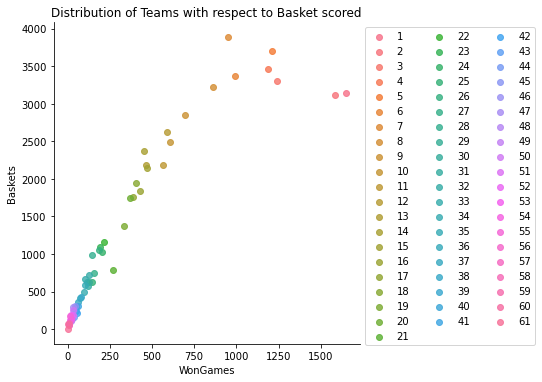

In [52]:
data_plot = pd.DataFrame({"Baskets":sportsdf.BasketGiven, "WonGames":sportsdf.WonGames, "Team": sportsdf.Team.index+1})
ax = sns.lmplot(y="Baskets", x="WonGames", hue='Team', data=data_plot, legend=False)

#ax.legend(loc='lower center', bbox_to_anchor=(1.25, 0.5), ncol=2)
val = int(len(data_plot.Team)/5)
plt.legend(loc='upper left', ncol=3, bbox_to_anchor=(1, 1))
plt.title("Distribution of Teams with respect to Basket scored")
plt.show()

#### Conclusion: Team who has conceded more basket are not among the top winning team.

In [53]:
titleSeries = sportsdf[sportsdf['Title'] > 0]
titleSeries

,Team,Tournament,Score,PlayedGames,WonGames,DrawnGames,LostGames,BasketScored,BasketGiven,Year,Title
0,Team 1,86,4385,2762,1647,552,563,5947,3140,1929,3323
1,Team 2,86,4262,2762,1581,573,608,5900,3114,1929,2525
2,Team 3,80,3442,2614,1241,598,775,4534,3309,1929,108
3,Team 4,82,3386,2664,1187,616,861,4398,3469,1931,66
4,Team 5,86,3368,2762,1209,633,920,4631,3700,1929,87
5,Team 6,73,2819,2408,990,531,887,3680,3373,1934,14
7,Team 8,70,2573,2302,864,577,861,3228,3230,1929,23
8,Team 9,58,2109,1986,698,522,766,2683,2847,1939,1
9,Team 10,51,1884,1728,606,440,682,2159,2492,1932,10
10,Team 11,45,1814,1530,563,392,575,2052,2188,1941,15


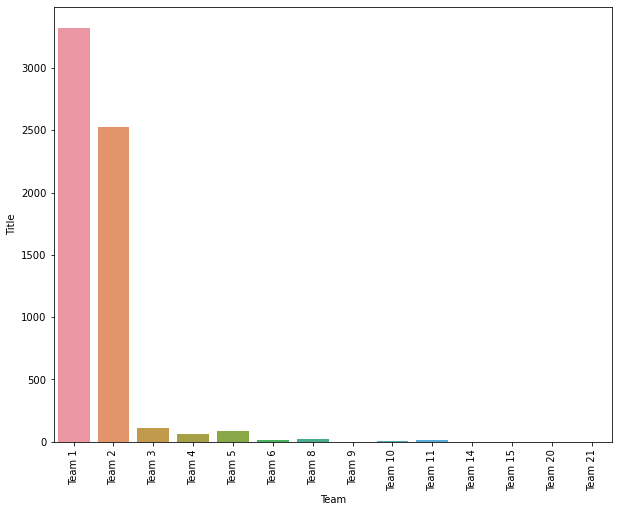

In [54]:
plt.figure(figsize=(10,8))
sns.barplot(x=titleSeries.Team, y=titleSeries.Title)
plt.xticks(rotation=90)
plt.show()

#### Conclusion: Team 1 has own highest title and after that team 2 has own the title. Only 20 teams out of 60 teams has own more than 1 title.

In [55]:
pd.options.display.max_colwidth

50

In [56]:
pd.options.display.max_colwidth = 80

<AxesSubplot:xlabel='Year'>

<Figure size 720x576 with 0 Axes>

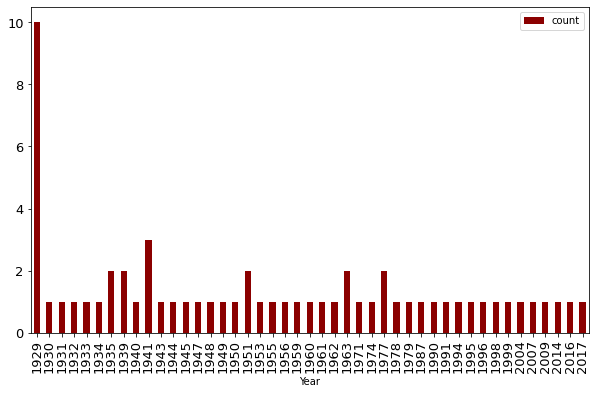

In [57]:
plt.figure(figsize=(10,8))
teams = sportsdf.Team
year = sportsdf.Year
teamyear = pd.DataFrame({'Year':year, 'Team':teams})
val = teamyear.groupby('Year')['Team'].agg(['count'])
val.plot(kind='bar', figsize=(10,6), color="darkred", fontsize=13)

In [58]:
teamyear.groupby('Year').agg(['sum', 'count'])

Team      
                                                                   sum count
Year                                                                        
1929  Team 1Team 2Team 3Team 5Team 7Team 8Team 14Team 45Team 52Team 54    10
1930                                                           Team 29     1
1931                                                            Team 4     1
1932                                                           Team 10     1
1933                                                           Team 18     1
1934                                                            Team 6     1
1935                                                    Team 16Team 26     2
1939                                                     Team 9Team 12     2
1940                                                           Team 28     1
1941                                             Team 11Team 22Team 35     3
1943                                                           Team 32     1
1944                                                           Team 15     1
1945                                                           Team 50     1
1947                                                           Team 47     1
1948                                                           Team 13     1
1949                                                           Team 17     1
1950                                                           Team 55     1
1951                                                    Team 20Team 59     2
1953                                                           Team 51     1
1955                                                           Team 60     1
1956                                                           Team 58     1
1959                                                           Team 24     1
1960                                                           Team 19     1
1961                                                           Team 27     1
1962                                                           Team 38     1
1963                                                    Team 30Team 42     2
1971                                                           Team 41     1
1974                                                           Team 31     1
1977                                                    Team 23Team 33     2
1978                                                           Team 40     1
1979                                                           Team 53     1
1987                                                           Team 34     1
1990                                                           Team 46     1
1991                                                           Team 36     1
1994                                                           Team 39     1
1995                                                           Team 49     1
1996                                                           Team 48     1
1998                                                           Team 21     1
1999                                                           Team 43     1
2004                                                           Team 25     1
2007                                                           Team 37     1
2009                                                           Team 57     1
2014                                                           Team 44     1
2016                                                           Team 56     1
2017                                                           Team 61     1

#### Conclusion: In Year 1929 only 10 teams played and after 10 years 1 team added with total team 11.  1 team over the year with few exception where upto 3 teams added in a single year. So, looking at this data indicate that competition was less in initial years. As team got added, competition has increased. This explains why top 5 team out of 6 in top 10 percentile has started playing in inauguration year 1929.

#### Overall only 33.33% teams has own the title and scored more. From given data, it proves that team started playing earlier has better performance and advantage compare to others. It may be due to less competition in earlier days. As participating team size grows, competition has increased but there is no data to back team performance against its oppoents. 

1. Also, data does not give clear picture of the team performance over the period of time. For example, performance of initial 10 teams improved or degraded in current playing condition?
2. There are few key details missing in data. For example, Data does not capture Team statistics against each of its opponents, matches are played in which condition like home match or away match etc.
3. There are few ambguity in the data like does team score is based on team performance in current season or all the matches played since team's inception?

###### Data should capture all the information addressing above points.

### DOMAIN: Startup ecosystem
##### CONTEXT: Company X is a EU online publisher focusing on the startups industry. The company specifically reports on the business related to technology news, analysis of emerging trends and profiling of new tech businesses and products. Their event i.e. Startup Battlefield is the world’s pre-eminent startup competition. Startup Battlefield features 15-30 top early stage startups pitching top judges in front of a vast live audience, present in person and online. 
##### DATA DESCRIPTION: : CompanyX_EU.csv - Each row in the dataset is a Start-up company and the columns describe the company
##### PROJECT OBJECTIVE: Analyse the data of the various companies from the given dataset and perform the tasks that are specified in the below steps. Draw insights from the various attributes that are present in the dataset, plot distributions, state hypotheses and draw conclusions from the dataset.
Steps and tasks:
1. Data warehouse:
• Read the CSV file.
2. Data exploration:
• Check the datatypes of each attribute. \
• Check for null values in the attributes.
3. Data preprocessing & visualisation:
• Drop the null values. \
• Convert the ‘Funding’ features to a numerical value. \
• Plot box plot for funds in million. \
• Get the lower fence from the box plot. \
• Check number of outliers greater than upper fence. \
• Drop the values that are greater than upper fence. \
• Plot the box plot after dropping the values. \
• Check frequency of the OperatingState features classes. \
• Plot a distribution plot for Funds in million. \
• Plot distribution plots for companies still operating and companies that closed. \
4. Statistical analysis:
• Is there any significant difference between Funds raised by companies that are still operating vs companies that closed down? 
Write the null hypothesis and alternative hypothesis. \
Test for significance and conclusion \
• Make a copy of the original data frame. \
• Check frequency distribution of Result variable. \
• Calculate percentage of winners that are still operating and percentage of contestants that are still operating \
• Write your hypothesis comparing the proportion of companies that are operating between winners and contestants: \
 Write the null hypothesis and alternative hypothesis. \
 Test for significance and conclusion \
• Check distribution of the Event variable. \
• Select only the Event that has disrupt keyword from 2013 onwards. \
• Write and perform your hypothesis along with significance test comparing the funds raised by companies across NY, SF and EU events from 2013 onwards. \
• Plot the distribution plot comparing the 3 city events.
5. Write your observations on improvements or suggestions on quality, quantity, variety, velocity, veracity etc. on the data points collected to perform
a better data analysis.

In [59]:
companydf = pd.read_csv('DS - Part3 - CompanyX_EU.csv')
companydf

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [60]:
companydf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Startup         662 non-null    object
 1   Product         656 non-null    object
 2   Funding         448 non-null    object
 3   Event           662 non-null    object
 4   Result          662 non-null    object
 5   OperatingState  662 non-null    object
dtypes: object(6)
memory usage: 31.2+ KB


In [61]:
# Count the total rows which has null value
companydf.isnull().T.any().T.sum()

216

In [62]:
# Check which row has NAN
nan_rows = companydf[companydf.isnull().any(1)]
nan_rows

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
...,...,...,...,...,...,...
648,YOOBIC,yoobic.com,NaN,Disrupt London 2015,Finalist,Operating
651,YourVersion,yourversion.com,NaN,TC50 2009,Audience choice,Operating
652,Yuwan,iyuwan.cn,NaN,Disrupt Beijing 2011,Contestant,Closed
653,ZAP!,zapreklam.com/,NaN,Disrupt EU 2014,Audience choice,Operating


In [63]:
# Check the count of column which has NA value
companydf.isna().T.any().T.sum()

216

In [64]:
nan_rows = companydf[companydf.isna().any(1)]
nan_rows

,Startup,Product,Funding,Event,Result,OperatingState
0,2600Hz,2600hz.com,NaN,Disrupt SF 2013,Contestant,Operating
2,3DPrinterOS,3dprinteros.com,NaN,Disrupt SF 2016,Contestant,Operating
4,42 Technologies,42technologies.com,NaN,Disrupt NYC 2013,Contestant,Operating
7,8020 Media,8020media.com,NaN,TC40 2007,Contestant,Operating
8,About Last Night,aboutlastnight.net,NaN,Disrupt NYC 2012,Contestant,Operating
...,...,...,...,...,...,...
648,YOOBIC,yoobic.com,NaN,Disrupt London 2015,Finalist,Operating
651,YourVersion,yourversion.com,NaN,TC50 2009,Audience choice,Operating
652,Yuwan,iyuwan.cn,NaN,Disrupt Beijing 2011,Contestant,Closed
653,ZAP!,zapreklam.com/,NaN,Disrupt EU 2014,Audience choice,Operating


In [65]:
# Function to calculate missing values by column (Reference: python code & FAQ)
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
missing = missing_values_table(companydf)
missing

Your selected dataframe has 6 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values
Funding,214,32.3
Product,6,0.9


In [66]:
# Funding has more 32.3% missing values, drop the rows which has missing values
companydfcopy = companydf.copy(deep=True)
companydf.dropna(inplace=True)
missing = missing_values_table(companydf)
companydf

Your selected dataframe has 6 columns.
There are 0 columns that have missing values.


,Startup,Product,Funding,Event,Result,OperatingState
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating
...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating


In [67]:
# Function to convert dataframe column Funding into floa datatype
# Input argument: Dataframe df
# return: Dataframe with Funding column as float datatype
def parsefunding(df):
    column = 'FundingInM'
    for label, row in df.iterrows():
        try:        
            unit = row[column][len(row[column])-1]
            val = row[column][1:len(row[column])-1]
            if unit == 'K':
                df.at[label,column] = float(val)/1000
            elif unit == 'M':
                df.at[label,column] = float(val)
            elif unit == 'B':
                df.at[label,column] = float(val)*1000
            else :
                df.at[label,column] = float(val)
        except (RuntimeError, TypeError) as err:
            print(format(err))
            break
    df  = df.astype({'FundingInM':float})
    return df
companydf['FundingInM'] = companydf['Funding']
companydf = parsefunding(companydf)
companydf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 446 entries, 1 to 661
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Startup         446 non-null    object 
 1   Product         446 non-null    object 
 2   Funding         446 non-null    object 
 3   Event           446 non-null    object 
 4   Result          446 non-null    object 
 5   OperatingState  446 non-null    object 
 6   FundingInM      446 non-null    float64
dtypes: float64(1), object(6)
memory usage: 47.9+ KB


In [68]:
funding = companydf.FundingInM
funding.describe()

count     446.000000
mean       17.241489
std        90.483710
min         0.005000
25%         0.745250
50%         2.200000
75%         9.475000
max      1700.000000
Name: FundingInM, dtype: float64

###### IQR

In [69]:
IQR = funding.quantile(0.75)-funding.quantile(0.25)
IQR

8.72975

###### Plot box plot

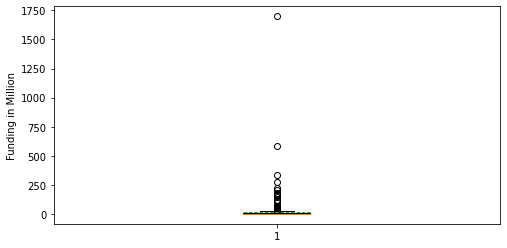

In [70]:
fig = plt.figure(figsize =(8,4))

# Creating plot
ax = plt.boxplot(funding,showmeans=True, showfliers=True, showcaps=True, meanline=True, autorange=False, whis=1.5)
plt.xlabel("")
plt.ylabel("Funding in Million")
# show plot
plt.show()

###### Lower Fence =  Q1 - (1.5 * IQR) 

In [71]:
lower_fence = funding.quantile(0.25)-(1.5*IQR)
lower_fence

-12.349374999999998

###### Lower Fence values from box can be caluclated as below,

In [72]:
# ax['whiskers'][0].get_ydata()[1]
ax['caps'][0].get_data()[1][1]

0.005

###### Upper Fence: Q3 + (1.5 * IQR)

In [73]:
upper_fence = funding.quantile(0.75)+(1.5*IQR)
upper_fence

22.569625

###### From box plot

In [74]:
upper_fence = ax['caps'][1].get_data()[1][1]

###### Number of outliers greater than upper fence

In [75]:
above_outlier = companydf[companydf['FundingInM'] > upper_fence]
print('Count of number of outlier above upper fence: ', above_outlier.FundingInM.count())
above_outlier

Count of number of outlier above upper fence:  60


,Startup,Product,Funding,Event,Result,OperatingState,FundingInM
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.0
31,Anyclip,anyclip.com,$24M,TC50 2009,Finalist,Operating,24.0
40,Artsy,artsy.net,$50.9M,Disrupt NYC 2010,Contestant,Operating,50.9
49,Badgeville,badgeville.com,$40M,Disrupt SF 2010,Finalist,Acquired,40.0
56,Betterment,betterment.com,$205M,Disrupt NYC 2010,Finalist,Operating,205.0
108,Clickable,clickable.com,$32.5M,TC40 2007,Finalist,Acquired,32.5
113,Cloudflare,cloudflare.com,$182.1M,Disrupt SF 2010,Runner up,Operating,182.1
128,Credit Sesame,creditsesame.com,$35.4M,Disrupt SF 2010,Contestant,Operating,35.4
130,CrowdFlower Inc.,crowdflower.com,$38M,TC50 2009,Contestant,Operating,38.0
132,Cubic Telecom,cubictelecom.com,$37.1M,TC40 2007,Contestant,Operating,37.1


###### Drop the data above upper fence

In [76]:
without_outliers = companydf.drop(above_outlier.index)
without_outliers

,Startup,Product,Funding,Event,Result,OperatingState,FundingInM
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
11,AdRocket,adrocket.com,$1M,TC50 2008,Contestant,Closed,1.00
...,...,...,...,...,...,...,...
645,Yap,yapme.com,$10M,TC40 2007,Contestant,Closed,10.00
646,YayPay Inc,yaypay.com,$900K,Disrupt London 2015,Contestant,Operating,0.90
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00


###### Box plot after dropping values

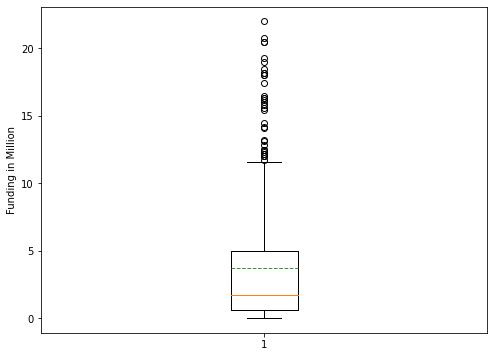

In [77]:
fundingwithoutoutlier = without_outliers.FundingInM
fig = plt.figure(figsize =(8, 6))

# Creating plot
ax = plt.boxplot(fundingwithoutoutlier,showmeans=True, showfliers=True, showcaps=True, meanline=True, autorange=False, whis=1.5)
plt.xlabel("")
plt.ylabel("Funding in Million")
# show plot
plt.show()

###### Frequency of the OperatingState features classes

In [78]:
operatingcount = companydf.OperatingState.value_counts(dropna=False)
print('Frequence of values in OperatingState column including NAN')
print(operatingcount)

Frequence of values in OperatingState column including NAN
Operating    319
Acquired      66
Closed        57
Ipo            4
Name: OperatingState, dtype: int64


###### Plot distribution of Funding in millions

<AxesSubplot:ylabel='Frequency'>

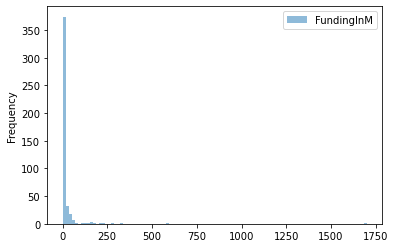

In [79]:
funds = companydf.FundingInM.astype(int)
companydf.plot.hist(by="FundingInM", bins=100, alpha=0.5)

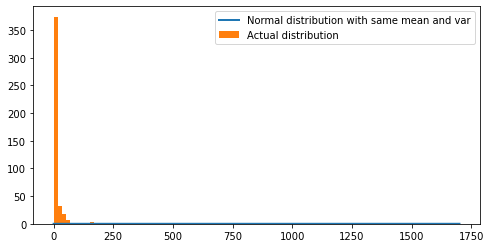

In [80]:
h = np.asarray(funds)
h = sorted(h)

plt.figure(figsize=(8,4))
#use the scipy stats module to fit a normal distirbution with same mean and standard deviation
fit = stats.norm.pdf(h, np.mean(h), np.std(h))
plt.plot(h,fit,'-',linewidth = 2,label="Normal distribution with same mean and var")
plt.hist(h,bins = 100,label="Actual distribution")      
plt.legend()
plt.show()

###### Distribution plots for companies still operating and closed

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='OperatingState', ylabel='count'>

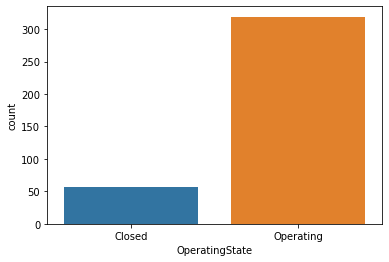

In [81]:
df = companydf[companydf['OperatingState'].str.contains('|'.join(['Closed','Operating']))]
sns.countplot(df['OperatingState'])

##### Hypothesis
##### H0: Average funds raised by operating companies = average funds of closed down companies
##### Ha: Average funds raised by operating companies does not match with average funds of closed down companies

In [82]:
from statsmodels.stats.power import ttest_power
from scipy.stats import ttest_1samp, ttest_ind, mannwhitneyu, levene, shapiro

In [83]:
# Group 1: Get random sampls of size 30
g1 = companydf[companydf['OperatingState'].str.contains('Operating')]
g1 = g1[['FundingInM']].sample(30)

In [84]:
#Group 2: Get random samples of size 30
g2 = companydf[companydf['OperatingState'].str.contains('Closed')]
g2 = g2[['FundingInM']].sample(30)

In [85]:
t_statistic, p_value = ttest_ind(g1, g2, equal_var=True)
print('T_statistics: ', t_statistic, ' P-Value: ', p_value)


T_statistics:  [2.02403445]  P-Value:  [0.04758105]


###### P value is greater than alpha value which 0.05/0.025 so Null hypothesis is accepted and fail to reject H0 

In [86]:
companydf1 = companydf.copy(deep=True)
companydf1

,Startup,Product,Funding,Event,Result,OperatingState,FundingInM
1,3DLT,3dlt.com,$630K,Disrupt NYC 2013,Contestant,Closed,0.63
3,3Dprintler,3dprintler.com,$1M,Disrupt NY 2016,Audience choice,Operating,1.00
5,5to1,5to1.com,$19.3M,TC50 2009,Contestant,Acquired,19.30
6,8 Securities,8securities.com,$29M,Disrupt Beijing 2011,Finalist,Operating,29.00
10,AdhereTech,adheretech.com,$1.8M,Hardware Battlefield 2014,Contestant,Operating,1.80
...,...,...,...,...,...,...,...
657,Zivity,zivity.com,$8M,TC40 2007,Contestant,Operating,8.00
658,Zmorph,zmorph3d.com,$1M,-,Audience choice,Operating,1.00
659,Zocdoc,zocdoc.com,$223M,TC40 2007,Contestant,Operating,223.00
660,Zula,zulaapp.com,$3.4M,Disrupt SF 2013,Audience choice,Operating,3.40


###### Distribution of Results

Result
Audience choice     25
Contestant         312
Finalist            65
Runner up           19
Winner              25
dtype: int64

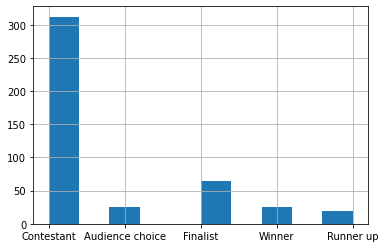

In [87]:
companydf1.Result.hist()
companydf1.groupby('Result').size()

In [88]:
companydf1.Result.unique()

array(['Contestant', 'Audience choice', 'Finalist', 'Winner', 'Runner up'],
      dtype=object)

######  Percentage of winners that are still operating and percentage of contestants that are still operating

In [89]:
operatingwinners = companydf1[(companydf1['Result'].str.contains('Winner')) & (companydf1['OperatingState'].str.contains('Operating'))]
totalwinners = companydf1[(companydf1['Result'].str.contains('Winner'))]
print('% of winners that are operating: ', (len(operatingwinners)/len(totalwinners))*100)

% of winners that are operating:  72.0


In [90]:
operatingcontestant = companydf1[(companydf1['Result'].str.contains('Contestant')) & (companydf1['OperatingState'].str.contains('Operating'))]
totalcontestant = companydf1[(companydf1['Result'].str.contains('Contestant'))]
print('% of contestant that are operating: ', (len(operatingcontestant)/len(totalcontestant))*100)

% of contestant that are operating:  68.58974358974359


###### Hypothesis
###### H0 =  Proportion of companies that are operating between winners and contestants are same
###### Ha =  proportion of companies that are operating between winners and contestants are different

In [91]:
operatingcontestentcount = len(operatingcontestant)
operatingwinnercount = len(operatingwinners)
totalwinnercount = len(totalwinners)
totalcontestentcount = len(totalcontestant)

In [92]:
from statsmodels.stats.proportion import proportions_ztest

test_statistic, p_value = proportions_ztest([operatingwinnercount, operatingcontestentcount],[totalwinnercount,totalcontestentcount])
print(test_statistic, ' ', p_value)
if p_value < 0.05:
    print(f'With a p-value of {round(p_value,4)} the difference is significant. aka |We reject the null|')
else:
    print(f'With a p-value of {round(p_value,4)} the difference is not significant. aka |We fail to reject the null|')

0.3542506401722957   0.7231510556194248
With a p-value of 0.7232 the difference is not significant. aka |We fail to reject the null|


######  Distribution of the Event variable

In [93]:
companydf1.groupby('Event').size()

Event
-                             6
Disrupt Beijing 2011          7
Disrupt EU 2013               9
Disrupt EU 2014              10
Disrupt London 2015          12
Disrupt London 2016          10
Disrupt NY 2015              21
Disrupt NY 2016              16
Disrupt NYC 2010             15
Disrupt NYC 2011             19
Disrupt NYC 2012             21
Disrupt NYC 2013             22
Disrupt NYC 2014             16
Disrupt SF 2010              19
Disrupt SF 2011              24
Disrupt SF 2012              20
Disrupt SF 2013              22
Disrupt SF 2014              19
Disrupt SF 2015              19
Disrupt SF 2016              17
Hardware Battlefield 2014    13
Hardware Battlefield 2015    10
Hardware Battlefield 2016    12
TC40 2007                    30
TC50 2008                    31
TC50 2009                    26
dtype: int64

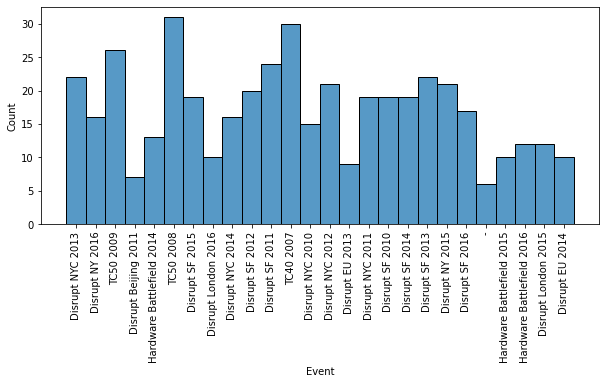

In [94]:
#companydf1.Event.hist()
plt.figure(figsize=(10,4))
sns.histplot(companydf1.Event)
plt.xticks(rotation=90)
plt.show()

###### Event that has disrupt keyword from 2013

In [95]:
eventafter2013 = companydf1[companydf1.Event.apply(lambda x: 'Disrupt' in x and int(x[-4:]) > 2013)].Event 
eventafter2013

3          Disrupt NY 2016
13         Disrupt SF 2015
14     Disrupt London 2016
16         Disrupt SF 2015
18        Disrupt NYC 2014
              ...         
633        Disrupt NY 2015
634        Disrupt SF 2015
635        Disrupt NY 2015
642        Disrupt SF 2014
646    Disrupt London 2015
Name: Event, Length: 140, dtype: object

###### Hypothesis
###### H0: Funds has raised from NY, SF and EU event
###### Ha: Fail to raise funds from these events

In [96]:
ny = companydf1.loc[eventafter2013[eventafter2013.apply(lambda x: 'NY' in x)].index, 'FundingInM']
sf = companydf1.loc[eventafter2013[eventafter2013.apply(lambda x: 'SF' in x)].index, 'FundingInM']
eu = companydf1.loc[eventafter2013[eventafter2013.apply(lambda x: 'EU' in x)].index, 'FundingInM']

In [97]:
# Performing One way ANOVA test for multiple variable
from scipy.stats import f_oneway
f_stats, p_value = f_oneway(ny, sf, eu)
print(f'Statistics: {f_stats} and p-value: {p_value}')
if p_value < 0.05 :
    print('Reject the null hypothesis')
else :
    print('Fail to reject null hypothesis')

Statistics: 0.5026769345913888 and p-value: 0.6062320750733347
Fail to reject null hypothesis


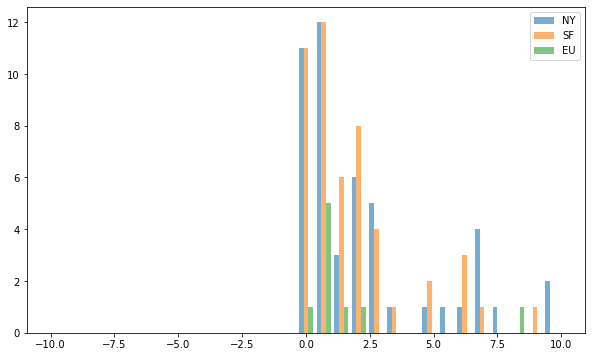

In [98]:
bins = np.linspace(-10, 10, 30)
plt.figure(figsize=(10,6))
plt.hist([ny,sf,eu], bins, alpha=0.6, label=['NY','SF','EU'])
#plt.hist(sf, bins, alpha=0.5, label='SF')
#plt.hist(eu, bins, alpha=0.5, label='EU')
plt.legend(loc='upper right')
plt.show()

##### Distribution of funds is almost same and it does not prove that companies participating any of the event raised high or low fund

1. Data contains large outliers
2. Data does not capture the performance of company over the period \
3. Most of the data is categorical in nature and there are few data descripencies like null value or missing value \
4. Data should capture product performance and its success or failure attributes which directly impact company performance